17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 73s 450ms/step - accuracy: 0.6957 - loss: 0.5593 - val_accuracy: 0.8746 - val_loss: 0.3079
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 70s 449ms/step - accuracy: 0.9086 - loss: 0.2388 - val_accuracy: 0.8690 - val_loss: 0.3163
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 77s 490ms/step - accuracy: 0.9411 - loss: 0.1647 - val_accuracy: 0.8692 - val_loss: 0.3426
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step

Classification Report:

              precision    recall  f1-score   support

    Negative       0.89      0.83      0.86     12500
    Positive       0.84      0.90      0.87     12500

    accuracy                           0.86     25000
   macro avg       0.87      0.86      0.86     25000
weighted avg       0.87      0.86      0.86     25000



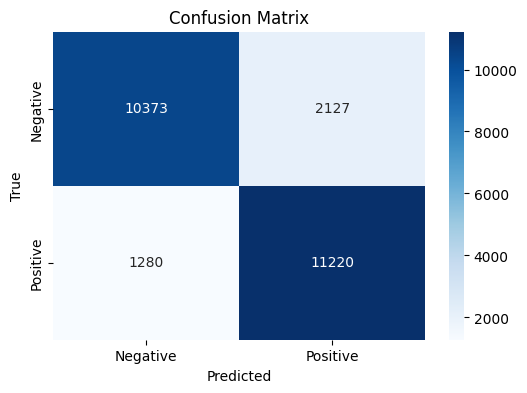

In [4]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load IMDB dataset
vocab_size = 10000  # Use top 10,000 words
max_len = 200       # Pad sequences to length 200

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

# Build the LSTM model
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=max_len))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=3, batch_size=128, validation_split=0.2)

# Evaluate the model and get predictions
y_pred_probs = model.predict(x_test)
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()

# Generate confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])

# Print classification report
print("\nClassification Report:\n")
print(report)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
